Video FPS: 29.743095371330988, Total Frames: 639, Duration: 21.483977777777778s
Estimated Heart Rate: 79.82 BPM


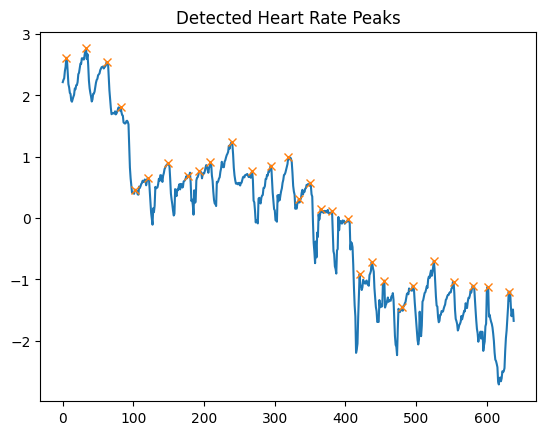

Estimated SpO2: 85.00%


In [1]:
# Import necessary libraries
import cv2
import numpy as np
from scipy.signal import find_peaks
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Function to process video and analyze the fingertip pulse
def process_video(video_path):
    cap = cv2.VideoCapture(video_path)
    
    if not cap.isOpened():
        print("Error opening video file")
        return

    fps = cap.get(cv2.CAP_PROP_FPS)
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    duration = frame_count / fps
    
    print(f"Video FPS: {fps}, Total Frames: {frame_count}, Duration: {duration}s")

    brightness_values = []

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        # Convert frame to grayscale (or focus on the red channel for PPG analysis)
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Crop the region of interest (center of the frame where the finger is likely placed)
        roi = gray_frame[100:400, 100:400]

        # Calculate the average brightness in the region of interest
        avg_brightness = np.mean(roi)
        brightness_values.append(avg_brightness)

    cap.release()
    
    return np.array(brightness_values), fps

# Function to detect heart rate from brightness values
def detect_heart_rate(brightness_values, fps):
    # Detrending the signal (optional, depends on the signal)
    detrended = brightness_values - np.mean(brightness_values)

    # Find peaks in the brightness values (each peak corresponds to a heartbeat)
    peaks, _ = find_peaks(detrended, distance=fps * 0.5)  # assuming heart rate is > 30 BPM
    
    # Calculate heart rate
    peak_intervals = np.diff(peaks) / fps
    avg_heartbeat_interval = np.mean(peak_intervals)
    heart_rate = 60 / avg_heartbeat_interval
    
    return heart_rate, detrended, peaks

# Function to estimate SpO2 (using a simplified approach)
# NOTE: This requires two different color channels (red and infrared or similar).
def estimate_spo2(brightness_values_red, brightness_values_ir):
    # For real-world SpO2 estimation, you need red and infrared channel analysis.
    # This is a placeholder for a simplified algorithm.
    r_ratio = np.mean(brightness_values_red) / np.mean(brightness_values_ir)
    
    # Using a basic linear model (example coefficients, adjust with calibration)
    spo2 = 110 - 25 * r_ratio
    
    return spo2

# Main function
def main(video_path):
    brightness_values, fps = process_video(video_path)
    
    # Estimate heart rate
    heart_rate, detrended_signal, peaks = detect_heart_rate(brightness_values, fps)
    print(f"Estimated Heart Rate: {heart_rate:.2f} BPM")

    # Plot the signal and detected peaks
    plt.plot(detrended_signal)
    plt.plot(peaks, detrended_signal[peaks], "x")
    plt.title("Detected Heart Rate Peaks")
    plt.show()

    # Placeholder: Generate synthetic IR signal (or use different color channels from the video)
    brightness_values_ir = brightness_values  # Replace with IR data if available

    # Estimate SpO2
    spo2 = estimate_spo2(brightness_values, brightness_values_ir)
    print(f"Estimated SpO2: {spo2:.2f}%")

# Run the program
video_path = '/home/dipendu/programs/mtech_2023/sem-3/ssiot/video_20240917_014916.mp4'  # Replace with the path to your video
main(video_path)
